In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('credit.csv')

df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [3]:
x = df.drop('Balance', axis=1)
y = df['Balance']

x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

try:
    test_model = LinearRegression().fit(x_train,y_train)
except Exception as e:
    print('Error!:',e)

Error!: could not convert string to float: 'Female'


In [4]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [5]:
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_features.remove('Balance')

x = df[numeric_features]
y = df['Balance']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model1 = LinearRegression().fit(x_train, y_train)

train_score = model1.score(x_train,y_train)
test_score = model1.score(x_test, y_test)

print('Train R2', train_score)
print('Test R2', test_score)
print('In the train data, Etnicity takes on the values', list(df['Ethnicity'].unique()))


Train R2 0.8884475002185803
Test R2 0.8212531865399557
In the train data, Etnicity takes on the values ['Caucasian', 'Asian', 'African American']


In [6]:
df = pd.read_csv('credit.csv')

x =  df.drop('Balance', axis=1)
y = df['Balance']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

x_train_design = pd.get_dummies(x_train, drop_first = True)
x_test_design = pd.get_dummies(x_test, drop_first= True)

x_test_design = x_test_design.reindex(columns= x_train_design.columns, fill_value  = 0)

print(x_train_design.head())


      Income  Limit  Rating  Cards  Age  Education  Gender_Female  \
3    148.924   9504     681      3   36         11           True   
18    49.570   6384     448      1   28          9           True   
202   21.038   1448     145      2   58         13           True   
250   10.363   2430     191      2   47         18           True   
274   30.550   5869     439      5   81          9           True   

     Student_Yes  Married_Yes  Ethnicity_Asian  Ethnicity_Caucasian  
3          False        False             True                False  
18         False         True             True                False  
202        False         True            False                 True  
250        False         True             True                False  
274        False        False            False                False  


In [7]:
x_train_design.dtypes

Income                 float64
Limit                    int64
Rating                   int64
Cards                    int64
Age                      int64
Education                int64
Gender_Female             bool
Student_Yes               bool
Married_Yes               bool
Ethnicity_Asian           bool
Ethnicity_Caucasian       bool
dtype: object

In [8]:
x =  pd.get_dummies(df.drop('Balance', axis=1), drop_first=True)
if x.isnull().any().any():
    x.fillna(0, inplace=True)

print(x.dtypes)

y = df['Balance'].astype(float)

x_train_design, x_test_design, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model2 =LinearRegression().fit(x_train_design, y_train)
train_score= model2.score(x_train_design, y_train)
test_score = model2.score(x_test_design, y_test)
print('Train R2', train_score)
print('Test R2:', test_score)

Income                 float64
Limit                    int64
Rating                   int64
Cards                    int64
Age                      int64
Education                int64
Gender_Female             bool
Student_Yes               bool
Married_Yes               bool
Ethnicity_Asian           bool
Ethnicity_Caucasian       bool
dtype: object
Train R2 0.9552255011405162
Test R2: 0.9522674050276461


In [9]:
coefs = pd.DataFrame(model2.coef_, index=x_train_design.columns,columns=['beta_value'])
coefs

,beta_value
Income,-7.554059
Limit,0.198058
Rating,0.971292
Cards,19.123826
Age,-0.603695
Education,-1.078674
Gender_Female,-12.493725
Student_Yes,418.435398
Married_Yes,-6.150365
Ethnicity_Asian,13.295548


[Text(0.5, 1.0, 'Model Coefficients')]

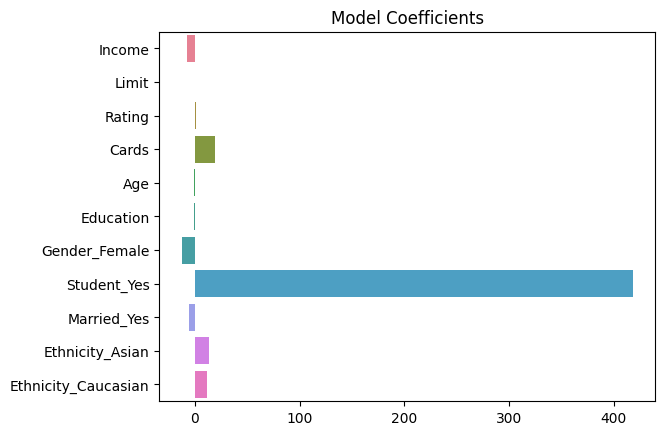

In [10]:
import seaborn as sns
sns.barplot(data=coefs.T, orient='h').set(title='Model Coefficients')

In [11]:
best_cat_feature = 'Student_Yes'

features = ['Income', best_cat_feature]
model3= LinearRegression()
model3.fit(x_train_design[features], y_train)
beta0 = model3.intercept_
beta1 = model3.coef_[features.index('Income')]
beta2 = model3.coef_[features.index(best_cat_feature)]

coefs = pd.DataFrame([beta0, beta1, beta2],index=['Intercept']+ features, columns=['beta_value'])
coefs

,beta_value
Intercept,177.658909
Income,6.773090
Student_Yes,371.895694


[Text(0.5, 1.0, 'Model coeffients')]

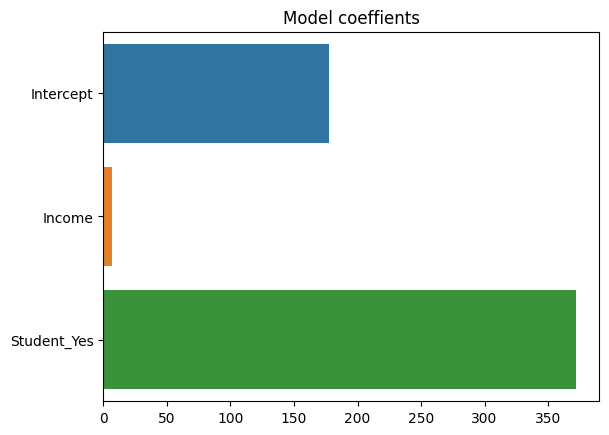

In [12]:
sns.barplot(data=coefs.T, orient='h').set(title='Model coeffients')

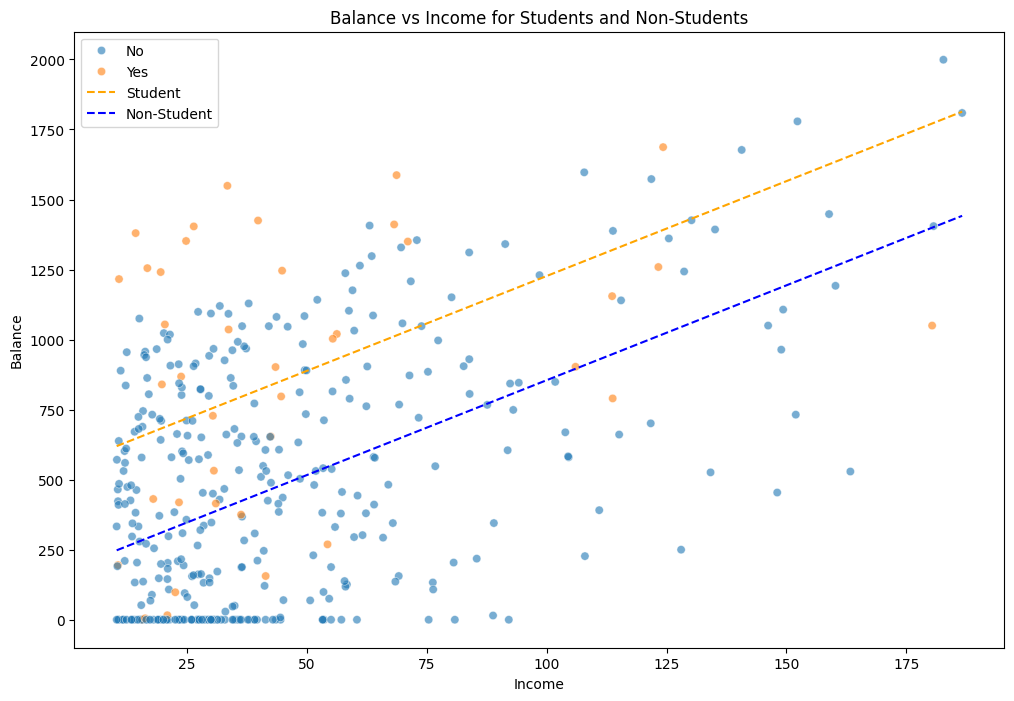

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('credit.csv')

# Define features and target
X = df[['Income', 'Student']]
y = df['Balance']

# Create dummy variables for 'Student' status
X = pd.get_dummies(X, drop_first=True)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression().fit(x_train, y_train)

# Extract model parameters
intercept = model.intercept_
income_coef = model.coef_[x_train.columns.get_loc('Income')]
student_coef = model.coef_[x_train.columns.get_loc('Student_Yes')]

# Create a space of income values for prediction
income_space = np.linspace(x_train['Income'].min(), x_train['Income'].max(), 1000)

# Generate predictions for both categories
y_hat_yes = intercept + income_coef * income_space + student_coef * 1
y_hat_no = intercept + income_coef * income_space + student_coef * 0

# Plot the data and prediction lines
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Income', y='Balance', hue='Student', alpha=0.6)
plt.plot(income_space, y_hat_yes, label='Student', color='orange', linestyle='--')
plt.plot(income_space, y_hat_no, label='Non-Student', color='blue', linestyle='--')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.title('Balance vs Income for Students and Non-Students')
plt.legend()
plt.show()# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv('credit.csv')

# Define features and target
model = LinearRegression().fit(x_train, y_train)